SHARED NOTEBOOK : Espaço para postarmos as melhorias incrementais do projeto (a partir de desenvolvimento nos nossos respectivos notebooks privados).

Não se esqueçam de salvar as versões após as mudanças! 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from datetime import datetime
import calendar

In [3]:
data = pd.read_csv('donors.csv', low_memory=False)


                            PROMOTION CODES
                            1st 2 bytes of the code refers to the year of the
                            mailing while 3rd and 4th bytes refer to the
                            following promotion codes/types:

                            LL mailings had labels only
                            WL mailings had labels only
                            CC mailings are calendars with stickers but do
                               not have labels
                            FS mailings are blank cards that fold into
                               thirds with labels
                            NK mailings are blank cards with labels
                            SK mailings are blank cards with labels
                            TK mailings have thank you printed on the
                               outside with labels
                            GK mailings are general greeting cards (an
                               assortment of birthday, sympathy, blank, & get
                               well) with labels
                            XK mailings are Christmas cards with labels
                            X1 mailings have labels and a notepad
                            G1 mailings have labels and a notepad

                            This information could certainly be used to calculate
                            several summary variables that count the number of
                            occurrences of various types of promotions received
                            in the most recent 12-36 months, etc.



In [4]:
adate = data[['Unnamed: 0','ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12','ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_20','ADATE_21','ADATE_22','ADATE_23','ADATE_24']]
adate.columns = ['ID','17NK','16NK','16TK','16SK','16LL','16G1','16GK','16CC','16WL','16X1','16XK','15FS','15NK','15TK','15LL','15G1','15GK','15CC','15WL','15X1','15XK','14FS','14NK']
adate # Date the 17NK promotion was mailed

,ID,17NK,16NK,16TK,16SK,16LL,16G1,16GK,16CC,16WL,...,15TK,15LL,15G1,15GK,15CC,15WL,15X1,15XK,14FS,14NK
0,0,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,...,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01
1,1,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,...,NaN,2015-03-01,NaN,NaN,2014-11-01,2014-11-01,2014-10-01,2014-09-01,NaN,2014-06-01
2,2,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,...,2015-04-01,2015-03-01,NaN,2015-01-01,2014-11-01,NaN,NaN,2014-09-01,2014-07-01,2014-06-01
3,3,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,NaN,...,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,NaN,NaN
4,4,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2015-12-01,2016-01-01,2015-11-01,2015-10-01,...,NaN,2015-03-01,2015-02-01,2014-12-01,2014-11-01,2014-11-01,2014-10-01,2015-06-01,2014-07-01,2014-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,95407,2017-06-01,2016-06-01,2016-04-01,NaN,2016-03-01,2016-01-01,2015-12-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95408,95408,2017-06-01,NaN,NaN,NaN,NaN,2016-01-01,2016-01-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95409,95409,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,NaN,2016-01-01,2015-11-01,2015-10-01,...,2015-04-01,2015-03-01,NaN,2015-01-01,NaN,NaN,2014-09-01,2014-08-01,NaN,NaN
95410,95410,2017-06-01,2016-06-01,2016-09-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,...,2015-04-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-11-01,2014-10-01,2014-09-01,2014-07-01,2014-06-01


In [5]:
adate.iloc[36]

ID              36
17NK    2017-06-01
16NK    2016-06-01
16TK    2016-04-01
16SK           NaN
16LL    2016-03-01
16G1    2016-02-01
16GK    2015-12-01
16CC    2015-11-01
16WL           NaN
16X1           NaN
16XK           NaN
15FS           NaN
15NK    2015-06-01
15TK           NaN
15LL           NaN
15G1           NaN
15GK           NaN
15CC           NaN
15WL           NaN
15X1           NaN
15XK           NaN
14FS           NaN
14NK           NaN
Name: 36, dtype: object

In [6]:
rfa = data[['Unnamed: 0','RFA_2','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10','RFA_11','RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18','RFA_19','RFA_20','RFA_21','RFA_22','RFA_23','RFA_24']]
rfa.columns = ['ID','17NK','16NK','16TK','16SK','16LL','16G1','16GK','16CC','16WL','16X1','16XK','15FS','15NK','15TK','15LL','15G1','15GK','15CC','15WL','15X1','15XK','14FS','14NK']
rfa.drop(columns = 'ID') # Donor's RFM status as of 17NK promotion date

,17NK,16NK,16TK,16SK,16LL,16G1,16GK,16CC,16WL,16X1,...,15TK,15LL,15G1,15GK,15CC,15WL,15X1,15XK,14FS,14NK
0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,...,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E
1,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,...,,L1E,,,N1E,N1E,N1E,N1E,,F1E
2,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,...,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D
3,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,...,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,
4,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,...,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,L1G,F1G,F1G,,F1G,P1G,P1G,,,,...,,,,,,,,,,
95408,L1F,,,,,P1F,P1F,,,,...,,,,,,,,,,
95409,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,...,N2E,F1D,,F1D,,,P1D,P1D,,
95410,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,...,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F


In [7]:
rdate = data[['Unnamed: 0','RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8','RDATE_9','RDATE_10','RDATE_11','RDATE_12','RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18','RDATE_19','RDATE_20','RDATE_21','RDATE_22','RDATE_23','RDATE_24']]
rdate.columns = ['ID','16NK','16TK','16SK','16LL','16G1','16GK','16CC','16WL','16X1','16XK','15FS','15NK','15TK','15LL','15G1','15GK','15CC','15WL','15X1','15XK','14FS','14NK']
rdate = rdate.drop(columns = 'ID') #  Date the gift was received for 16NK

In [8]:
lastgiftdate = []
for i in range(0,len(rdate)):
    if rdate.iloc[i].isnull().sum() == 22:
        lastgiftdate.append(0)
    else:
        lastgiftdate.append(rdate.iloc[i][rdate.iloc[i].notnull()][0])

In [9]:
rdate['lastgiftdate'] = lastgiftdate

In [10]:
rdate.loc[:,'lastgiftdate'] = rdate.loc[:,'lastgiftdate'].map(lambda x: datetime.strptime(x, '%Y-%m-%d')
                                                              if not isinstance(x, int) else 0)

In [11]:
#Last promotion date
lastpromotiondate = datetime.strptime('2017-06-01', '%Y-%m-%d')
Recency = []
for i in rdate['lastgiftdate']:
    if i == 0:
        Recency.append(None)
    else:
        Recency.append((lastpromotiondate.year - i.year)*12 + (lastpromotiondate.month - i.month))
        

In [12]:
ramnt = data[['Unnamed: 0','RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6','RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12','RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16','RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22','RAMNT_23','RAMNT_24']]
ramnt.columns = ['ID','16NK','16TK','16SK','16LL','16G1','16GK','16CC','16WL','16X1','16XK','15FS','15NK','15TK','15LL','15G1','15GK','15CC','15WL','15X1','15XK','14FS','14NK']
ramnt = ramnt.drop(columns = 'ID')  #Dollar amount of the gift for 16NK

In [13]:
Monetary = ramnt.sum(axis=1)

In [14]:
Frequency = ramnt.count(axis=1)

In [15]:
data['Recency'] = Recency
data['Frequency'] = Frequency
data['Monetary'] = Monetary

In [16]:
RFM_Promotion = data.loc[:,['Recency','Frequency','Monetary']]
RFM_Promotion.dropna(inplace = True)

In [17]:
RFM_Promotion['Recency_star'] = pd.qcut(RFM_Promotion['Recency'].rank(method='first'), q=5 , labels= (5,4,3,2,1))
RFM_Promotion['Recency_star'] = RFM_Promotion['Recency_star'].astype(int)
RFM_Promotion['Frequency_star'] = pd.qcut(RFM_Promotion['Frequency'].rank(method='first'), q=5 , labels= range(1,6))
RFM_Promotion['Frequency_star'] = RFM_Promotion['Frequency_star'].astype(int)
RFM_Promotion['Monetary_star'] = pd.qcut(RFM_Promotion['Monetary'].rank(method='first'), q=5 , labels= range(1,6))
RFM_Promotion['Monetary_star'] = RFM_Promotion['Monetary_star'].astype(int)

In [18]:
RFM_Promotion['Stars'] = (RFM_Promotion['Recency_star'].astype(str) + 
                          RFM_Promotion['Frequency_star'].astype(str) + 
                          RFM_Promotion['Monetary_star'].astype(str))
RFM_Promotion

,Recency,Frequency,Monetary,Recency_star,Frequency_star,Monetary_star,Stars
0,18.0,7,73.0,4,5,5,455
1,18.0,2,37.0,4,2,3,423
2,21.0,7,58.0,2,5,5,255
3,18.0,7,65.0,4,5,5,455
4,17.0,2,25.0,4,2,2,422
...,...,...,...,...,...,...,...
95407,16.0,1,25.0,4,2,2,422
95408,15.0,1,20.0,5,2,2,522
95409,17.0,4,35.0,4,5,3,453
95410,10.0,9,157.0,5,5,5,555


In [21]:
kmeans_promotion = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=300)
kmeans_promotion.fit(RFM_Promotion.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']])

KMeans()

In [22]:
kmeans_promotion.n_iter_

7

In [23]:
kmeans_promotion.cluster_centers_

array([[1.81096964, 1.3998963 , 1.36532811],
       [2.27947965, 3.73193454, 2.47410827],
       [4.45057843, 1.64732902, 1.46240218],
       [2.1397383 , 4.43158868, 4.59408335],
       [3.9873397 , 2.44735767, 3.80666503],
       [4.54236212, 4.61583817, 4.57538099],
       [1.31977778, 2.33322222, 3.75366667],
       [4.53426698, 4.45664482, 2.44472586]])

In [24]:
RFM_Promotion['Cluster'] = kmeans_promotion.labels_

In [25]:
RFM_Promotion_table = RFM_Promotion.groupby(['Cluster']).agg(['mean'])

In [26]:
RFM_Promotion_table['Total'] = RFM_Promotion_table.loc[:,['Recency_star','Frequency_star', 'Monetary_star']].sum(axis = 1)

In [27]:
round(RFM_Promotion_table.sort_values(by = 'Total',ascending = False),2)

,Recency,Frequency,Monetary,Recency_star,Frequency_star,Monetary_star,Total
,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,
5,15.97,5.38,68.25,4.54,4.62,4.58,13.73
7,16.06,4.54,29.08,4.53,4.46,2.44,11.44
3,20.46,4.65,67.14,2.14,4.43,4.59,11.17
4,17.03,2.23,47.66,3.99,2.45,3.81,10.24
1,20.00,3.29,29.03,2.28,3.73,2.47,8.49
2,16.39,1.43,20.43,4.45,1.65,1.46,7.56
6,23.46,2.03,45.70,1.32,2.33,3.75,7.41
0,22.00,1.23,19.39,1.81,1.40,1.37,4.58


# RFM LIFE TIME

In [28]:
#transform to datetime
data['LASTDATE'] = data['LASTDATE'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [29]:
#Last promotion date
lastpromotiondate = datetime.strptime('2017-06-01', '%Y-%m-%d')
lastpromotiondate.year

2017

In [30]:
#Date associated with the most recent gift
data['Recency'] = (lastpromotiondate.year - data['LASTDATE'].dt.year)*12 + (lastpromotiondate.month - data['LASTDATE'].dt.month)

In [31]:
#Number of lifetime gifts to date
data['Frequency'] = data['NGIFTALL']

In [32]:
#Average dollar amount of gifts to date
data['Monetary'] = data['AVGGIFT']

In [33]:
RFM = data.loc[:, ['Recency', 'Frequency', 'Monetary']]

In [34]:
RFM

,Recency,Frequency,Monetary
0,18,31,7.741935
1,18,3,15.666667
2,18,27,7.481481
3,18,16,6.812500
4,17,37,6.864865
...,...,...,...
95407,16,1,25.000000
95408,15,1,20.000000
95409,8,7,8.285714
95410,5,41,12.146341


In [35]:
RFM['Recency_star'] = pd.qcut(RFM['Recency'].rank(method='first'), q=5 , labels= (5,4,3,2,1))
RFM['Recency_star'] = RFM['Recency_star'].astype(int)
RFM['Frequency_star'] = pd.qcut(RFM['Frequency'].rank(method='first'), q=5 , labels= range(1,6))
RFM['Frequency_star'] = RFM['Frequency_star'].astype(int)
RFM['Monetary_star'] = pd.qcut(RFM['Monetary'].rank(method='first'), q=5 , labels= range(1,6))
RFM['Monetary_star'] = RFM['Monetary_star'].astype(int)

In [36]:
RFM['Stars'] = (RFM['Recency_star'].astype(str) + RFM['Frequency_star'].astype(str) + RFM['Monetary_star'].astype(str))
RFM

,Recency,Frequency,Monetary,Recency_star,Frequency_star,Monetary_star,Stars
0,18,31,7.741935,4,5,2,452
1,18,3,15.666667,4,1,4,414
2,18,27,7.481481,4,5,1,451
3,18,16,6.812500,4,5,1,451
4,17,37,6.864865,4,5,1,451
...,...,...,...,...,...,...,...
95407,16,1,25.000000,4,1,5,415
95408,15,1,20.000000,5,1,5,515
95409,8,7,8.285714,5,3,2,532
95410,5,41,12.146341,5,5,3,553


In [37]:
 kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=300)

In [38]:
kmeans.fit(RFM.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']])

KMeans()

In [39]:
kmeans.n_iter_

9

In [40]:
kmeans.cluster_centers_

array([[2.1821223 , 2.23510191, 2.45448888],
       [4.00833333, 4.11638577, 3.80805243],
       [4.52954108, 4.57699002, 1.36612623],
       [2.14852668, 4.42699761, 1.45998142],
       [1.46379183, 1.31789543, 4.46583749],
       [1.356755  , 3.71752824, 3.89704605],
       [4.00034809, 1.5406572 , 4.5625174 ],
       [4.52594059, 2.41613861, 2.08970297]])

In [41]:
RFM['Cluster'] = kmeans.labels_

In [42]:
RFM.groupby(['Cluster']).agg(['min','max','mean'])

Recency                Frequency                   Monetary  \
            min max       mean       min  max       mean        min   
Cluster                                                               
0            18  27  19.989653         2    9   5.008791   4.400000   
1             4  18  15.278933         5   89  14.340169  10.200000   
2             4  18  14.825685         9   91  19.021801   1.285714   
3            18  27  20.033448         5  147  17.278405   1.363636   
4            18  27  22.052696         1    5   2.251207  10.333333   
5            18  27  22.528779         5  237  11.456668  10.200000   
6             4  18  16.337789         1    9   2.882554  10.333333   
7             4  18  15.489406         2    9   5.563465   2.571429   

                                Recency_star               Frequency_star      \
                 max       mean          min max      mean            min max   
Cluster                                                                         
0          13.000000  10.307535            1   3  2.182122              1   3   
1         221.444444  15.627924            3   5  4.008333              3   5   
2          10.200000   6.769936            4   5  4.529541              4   5   
3          13.000000   7.255862            1   3  2.148527              3   5   
4        1000.000000  19.964269            1   2  1.463792              1   2   
5         948.500000  16.340151            1   2  1.356755              3   5   
6         705.174444  21.132258            3   5  4.000348              1   3   
7          13.000000   9.199382            4   5  4.525941              1   3   

                  Monetary_star                
             mean           min max      mean  
Cluster                                        
0        2.235102             1   3  2.454489  
1        4.116386             3   5  3.808052  
2        4.576990             1   2  1.366126  
3        4.426998             1   3  1.459981  
4        1.317895             3   5  4.465837  
5        3.717528             3   5  3.897046  
6        1.540657             3   5  4.562517  
7        2.416139             1   3  2.089703

In [43]:
RFM_table = RFM.groupby(['Cluster']).agg(['mean'])

In [44]:
RFM_table['Total'] = RFM_table.loc[:,['Recency_star','Frequency_star', 'Monetary_star']].sum(axis = 1)

In [45]:
round(RFM_table.sort_values(by = 'Total',ascending = False),2)

,Recency,Frequency,Monetary,Recency_star,Frequency_star,Monetary_star,Total
,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,
1,15.28,14.34,15.63,4.01,4.12,3.81,11.93
2,14.83,19.02,6.77,4.53,4.58,1.37,10.47
6,16.34,2.88,21.13,4.00,1.54,4.56,10.10
7,15.49,5.56,9.20,4.53,2.42,2.09,9.03
5,22.53,11.46,16.34,1.36,3.72,3.90,8.97
3,20.03,17.28,7.26,2.15,4.43,1.46,8.04
4,22.05,2.25,19.96,1.46,1.32,4.47,7.25
0,19.99,5.01,10.31,2.18,2.24,2.45,6.87


In [46]:
round(RFM_Promotion_table.sort_values(by = 'Total',ascending = False),2)

,Recency,Frequency,Monetary,Recency_star,Frequency_star,Monetary_star,Total
,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,
5,15.97,5.38,68.25,4.54,4.62,4.58,13.73
7,16.06,4.54,29.08,4.53,4.46,2.44,11.44
3,20.46,4.65,67.14,2.14,4.43,4.59,11.17
4,17.03,2.23,47.66,3.99,2.45,3.81,10.24
1,20.00,3.29,29.03,2.28,3.73,2.47,8.49
2,16.39,1.43,20.43,4.45,1.65,1.46,7.56
6,23.46,2.03,45.70,1.32,2.33,3.75,7.41
0,22.00,1.23,19.39,1.81,1.40,1.37,4.58


In [47]:
data['DATASRCE']

0         
1        3
2        3
3        3
4        3
        ..
95407     
95408    3
95409     
95410    2
95411    3
Name: DATASRCE, Length: 95412, dtype: object

In [48]:
kmeans.inertia_

120163.12550640943

In [49]:
kmeans_promotion.inertia_

111556.19036983448

# Cluster Metric Tests

In [50]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

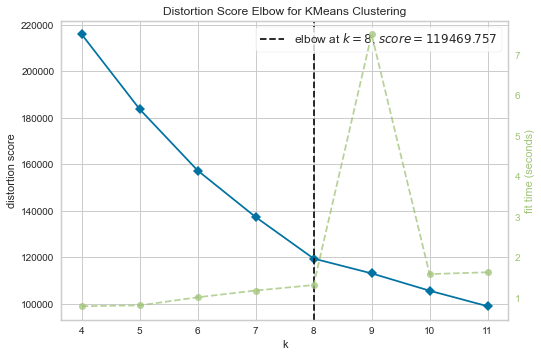

C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [51]:
X = RFM.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']]
kelbow_visualizer(KMeans(init='k-means++', n_init=10, max_iter=300), X, k=(4,12))

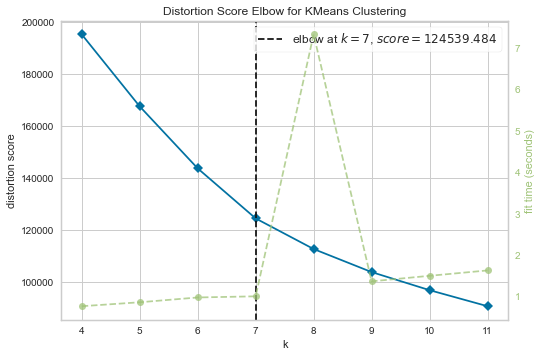

C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [52]:
X = RFM_Promotion.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']]
kelbow_visualizer(KMeans(init='k-means++', n_init=10, max_iter=300), X, k=(4,12))

In [ ]:
X = RFM.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']]
model = KMeans(init='k-means++', n_init=10, max_iter=300)
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
X = RFM_Promotion.loc[:, ['Recency_star','Frequency_star', 'Monetary_star']]
model = KMeans(init='k-means++', n_init=10, max_iter=300)
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure